<a href="https://colab.research.google.com/github/yoneda-kg/sparce/blob/main/Figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import random
import time
import jax
import matplotlib
import numpy as np
from scipy.stats import norm
from jax.scipy.stats import norm as normal
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
from sympy import *
from sympy.abc import *
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
import matplotlib.patheffects as patheffects
import japanize_matplotlib

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=05565a1c80ccde0141da003ac2b8fe92f39bc8e18e86211ae1871b061b49b2eb
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
def soft_threshold(x, ganma):
    """
    soft-thresholding function
    """
    return np.maximum(np.abs(x) - ganma, 0.0) * np.sign(x)

def df(r, gamma):
    """
    divergence-free function
    """
    eta = soft_threshold(r, gamma)
    return eta - np.mean(eta != 0) * r

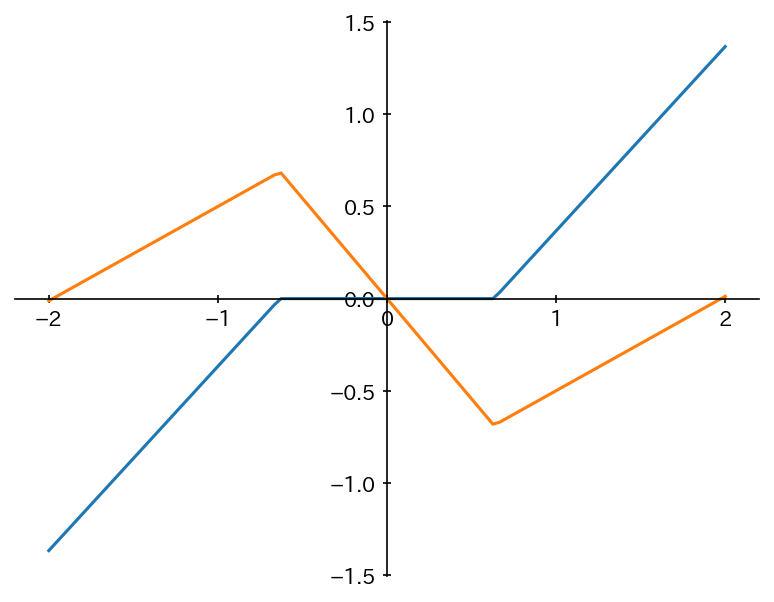

In [ ]:
x=np.linspace( -2, 2, 100)
y1=soft_threshold(x, 0.4**0.5)
y2 =1.6 *  df(x, 0.4**0.5)

fig,ax = plt.subplots(facecolor='white',dpi=150)
ax.plot(x,y1)
ax.plot(x, y2)

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='inout')
plt.xticks(np.arange(-2, 3, step=1))

plt.show()


In [50]:
N=100

In [67]:
def func_mmse(vector, threshold):
  xi = 0.4**(-1) + threshold
  top = normal.pdf(vector, loc=0, scale=xi**0.5) / xi
  bottom = 0.4 * normal.pdf(vector, loc=0, scale=xi**0.5) + (1-0.4) * normal.pdf(vector, loc=0, scale=threshold**0.5)
  return top / bottom * vector

def dfunc_mmse(w, tau):
  dfunc_mmse = jax.vmap(jax.grad(func_mmse, argnums=(0)), (0, None))
  return 1.6 * (func_mmse(w, tau) - np.mean(dfunc_mmse(w, tau)) * w)

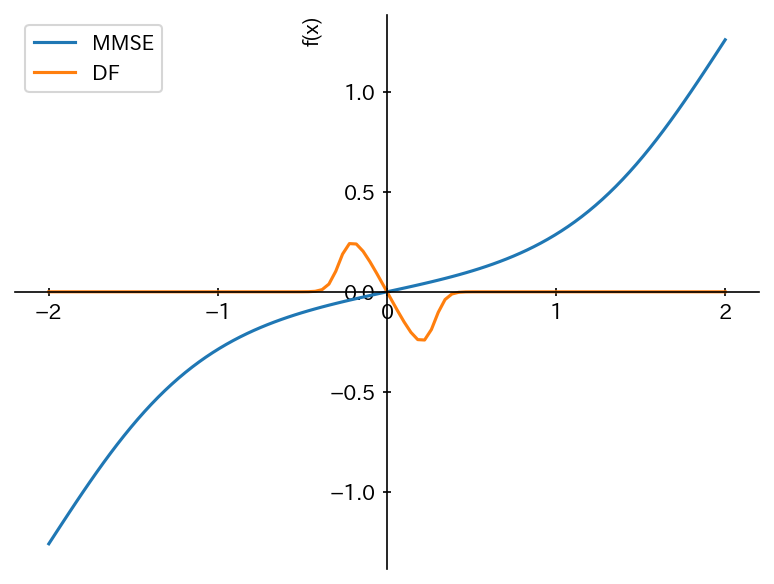

In [69]:
x=np.linspace( -2, 2, 100)
y1=func_mmse(x, 0.4**0.5)
y2 = dfunc_mmse(x, 0.4**5)

fig,ax = plt.subplots(facecolor='white',dpi=150)
plt.plot(x,y1, label="MMSE")
plt.plot(x,y2 ,label="DF")

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='inout')
plt.xticks(np.arange(-2, 3, step=1))
ax.set_ylabel('f(x)',loc='top')

plt.legend()
plt.show()